In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import pandas as pd

from pathlib import Path
from sbibm.utils.io import get_tensor_from_csv

## validation loss

In [3]:
root = Path("/home/ben/sci/cnre/infinite/")
experiment_folders = {
    "slcp": root / "outputs/2022-04-18/17-17-25",
    "two_moons": root / "outputs/2022-04-18/18-04-06",
    "gaussian_mixture": root / "outputs/2022-04-18/18-11-35",
    "gaussian_linear_uniform": root / "outputs/2022-04-18/18-24-56",
    # "slcp-big": root / "multirun/2022-04-19/10-20-49/2",
    # "two_moons-big": root / "multirun/2022-04-19/10-20-49/0",
    # "gaussian_mixture-big": root / "multirun/2022-04-19/10-20-49/1",
    # "gaussian_linear_uniform-big": root / "multirun/2022-04-19/10-20-49/3",
}
filename = "validation_loss.csv.bz2"

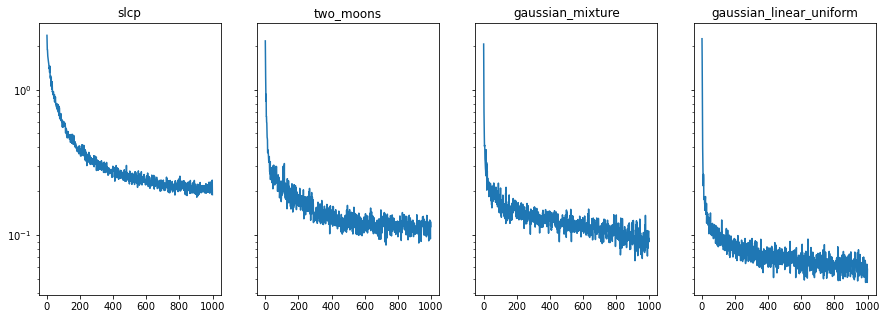

In [4]:
fig, axes = plt.subplots(ncols=len(experiment_folders), sharey="row", figsize=(15,5))
for ax, (name, experiment_folder) in zip(axes.flatten(), experiment_folders.items()):
    validation_loss = get_tensor_from_csv(experiment_folder / filename)
    ax.semilogy(validation_loss)
    ax.set_title(name)

## metrics csv

In [10]:
files = [
    "metrics01.csv", 
    "metrics02.csv", 
    # "metrics-512.csv", 
]
df = pd.concat([pd.read_csv(file, index_col=0) for file in files], ignore_index=True)
print(len(df))
print(df.columns)
df.head()

7
Index(['task', 'seed', 'algorithm', 'num_atoms', 'gamma', 'extra_theta_factor',
       'hidden_features', 'num_blocks', 'AVG_LOG_RATIO', 'RT', 'C2ST_Z-01',
       'MMD-01', 'MEDDIST-01', 'NLTP-01', 'C2ST_Z-02', 'MMD-02', 'MEDDIST-02',
       'NLTP-02', 'C2ST_Z-03', 'MMD-03', 'MEDDIST-03', 'NLTP-03', 'C2ST_Z-04',
       'MMD-04', 'MEDDIST-04', 'NLTP-04', 'C2ST_Z-05', 'MMD-05', 'MEDDIST-05',
       'NLTP-05', 'C2ST_Z-06', 'MMD-06', 'MEDDIST-06', 'NLTP-06', 'C2ST_Z-07',
       'MMD-07', 'MEDDIST-07', 'NLTP-07', 'C2ST_Z-08', 'MMD-08', 'MEDDIST-08',
       'NLTP-08', 'C2ST_Z-09', 'MMD-09', 'MEDDIST-09', 'NLTP-09', 'C2ST_Z-10',
       'MMD-10', 'MEDDIST-10', 'NLTP-10', 'NLTP', 'num_simulations_simulator',
       'path', 'folder'],
      dtype='object')


,task,seed,algorithm,num_atoms,gamma,extra_theta_factor,hidden_features,num_blocks,AVG_LOG_RATIO,RT,...,MEDDIST-09,NLTP-09,C2ST_Z-10,MMD-10,MEDDIST-10,NLTP-10,NLTP,num_simulations_simulator,path,folder
0,two_moons,3786736187,CNRE,10,1.0,0,50,2,6.761481,13.628964,...,0.091466,NaN,0.68260,0.011312,0.094796,NaN,NaN,21004000.0,/home/ben/sci/cnre/infinite/outputs/2022-04-18...,18-04-06
1,gaussian_linear_uniform,1194310415,CNRE,10,1.0,0,50,2,9.139327,134.950741,...,1.347719,NaN,0.54820,0.006898,1.404968,NaN,NaN,21004000.0,/home/ben/sci/cnre/infinite/outputs/2022-04-18...,18-24-56
2,slcp,819210056,CNRE,10,1.0,0,50,2,7.276005,19.653973,...,9.508600,NaN,0.86145,0.072336,1.927889,NaN,NaN,21004000.0,/home/ben/sci/cnre/infinite/outputs/2022-04-18...,17-17-25
3,gaussian_mixture,226741119,CNRE,10,1.0,0,50,2,7.722948,13.546547,...,0.630966,NaN,0.75895,0.044196,0.990800,NaN,NaN,21004000.0,/home/ben/sci/cnre/infinite/outputs/2022-04-18...,18-11-35
4,gaussian_mixture,2884778409,CNRE,10,1.0,0,128,3,8.787291,17.797449,...,0.685892,NaN,0.75060,0.014175,0.478910,NaN,NaN,21004000.0,/home/ben/sci/cnre/infinite/multirun/2022-04-1...,1


In [11]:
df_wide = pd.wide_to_long(
    df, 
    ["C2ST_Z"], 
    i=["task", "algorithm", "num_atoms", "gamma", "num_blocks", "hidden_features"], 
    j="num_observation", 
    sep="-"
)
df_wide.groupby([
    "task",
    "num_atoms",
    "gamma",
    "num_blocks",
    "hidden_features",
]).aggregate({
    "C2ST_Z": ["mean", "std"],
})

C2ST_Z  \
                                                                        mean   
task                    num_atoms gamma num_blocks hidden_features             
gaussian_linear_uniform 10        1.0   2          50               0.554705   
gaussian_mixture        10        1.0   2          50               0.729740   
                                        3          128              0.761295   
slcp                    10        1.0   2          50               0.826035   
                                        3          128              0.749010   
two_moons               10        1.0   2          50               0.626420   
                                        3          128              0.621790   

                                                                              
                                                                         std  
task                    num_atoms gamma num_blocks hidden_features            
gaussian_linear_uniform 10        1.0   2          50               0.020269  
gaussian_mixture        10        1.0   2          50               0.028734  
                                        3          128              0.015610  
slcp                    10        1.0   2          50               0.087958  
                                        3          128              0.097993  
two_moons               10        1.0   2          50               0.049756  
                                        3          128              0.044929